In [59]:
import pandas as pd
from src.data.anomalies import NoiseMachine

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
data = pd.read_parquet("data/cleaned_data/TL_type_additional_data_decomposed.parquet")

In [61]:
def get_rand_sequence():
    rand_id = data["id"].sample(1).values[0]
    data_rand = data[data["id"] == rand_id]
    return data_rand

# Point Anomaly

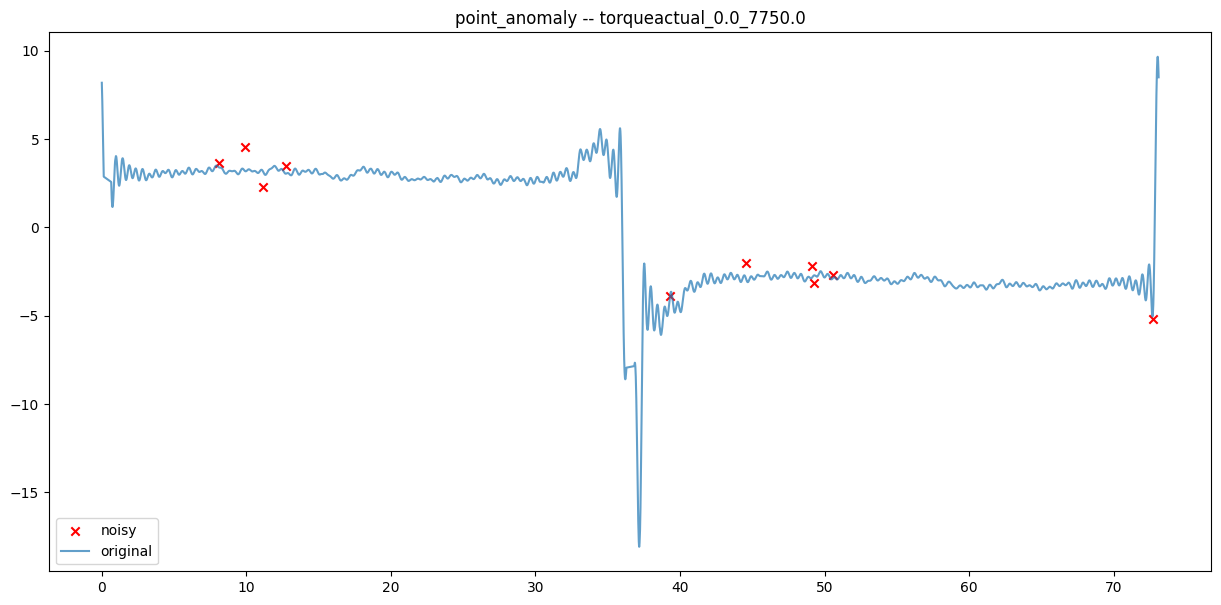

In [76]:
data_point = get_rand_sequence()

std = 1.0
num = 10

data_point = NoiseMachine.point_anomaly(data_point, num=num, std=std)
NoiseMachine.plot(data_point, column="torqueactual_0.0_7750.0")

# Gaussian Noise Anomaly

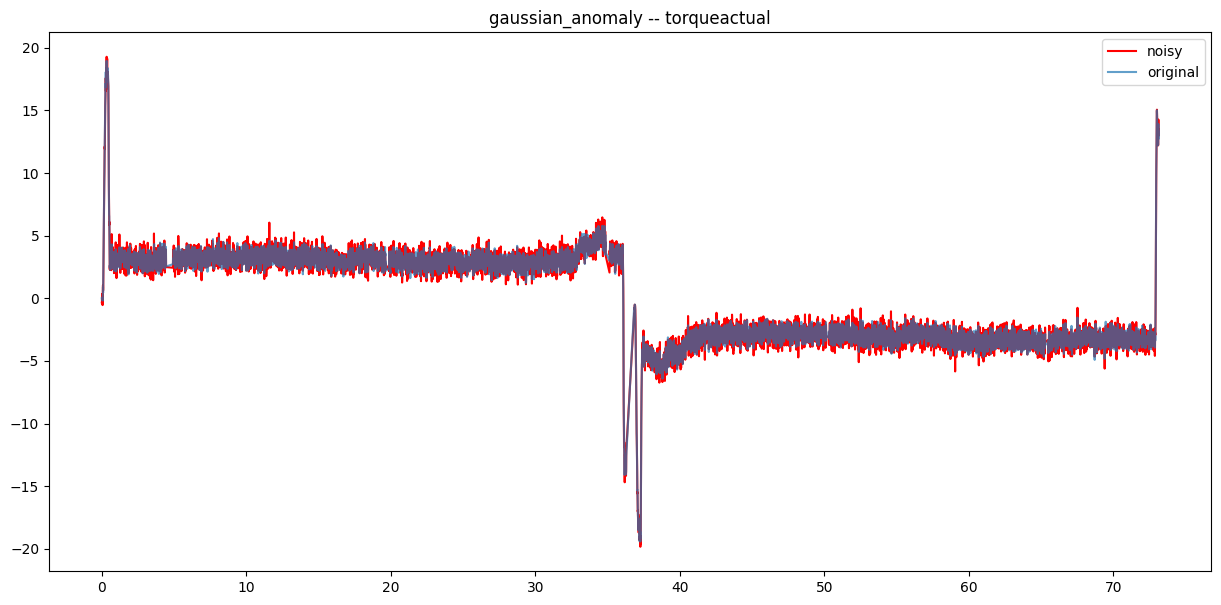

In [75]:
data_gauss = get_rand_sequence()

std = 0.4

data_gauss = NoiseMachine.gaussian_anomaly(data_gauss, std=std)
NoiseMachine.plot(data_gauss, column="torqueactual")

# Shift Anomaly

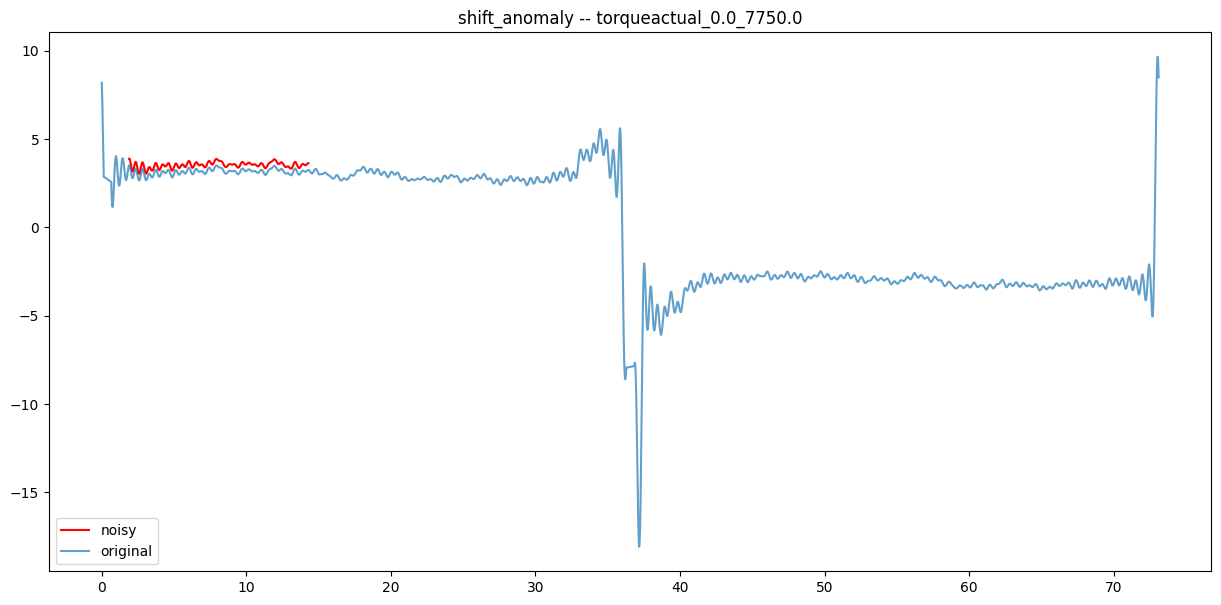

In [88]:
data_shift = get_rand_sequence()

start = 150
end = 1500
strength = 2

data_shift = NoiseMachine.shift_anomaly(
    data_shift,
    column="torqueactual_0.0_7750.0",
    start=start,
    end=end,
    strength=strength,
)
NoiseMachine.plot(data_shift, column="torqueactual_0.0_7750.0")

# Trend Anomaly

In [ ]:
data["type"] = data["id"].apply(lambda x: x.split("-")[1].split("|")[0])
data["datetime"] = data["id"].apply(lambda x: x.split("|")[1].replace("_", " "))
data["datetime"] = pd.to_datetime(data["datetime"])

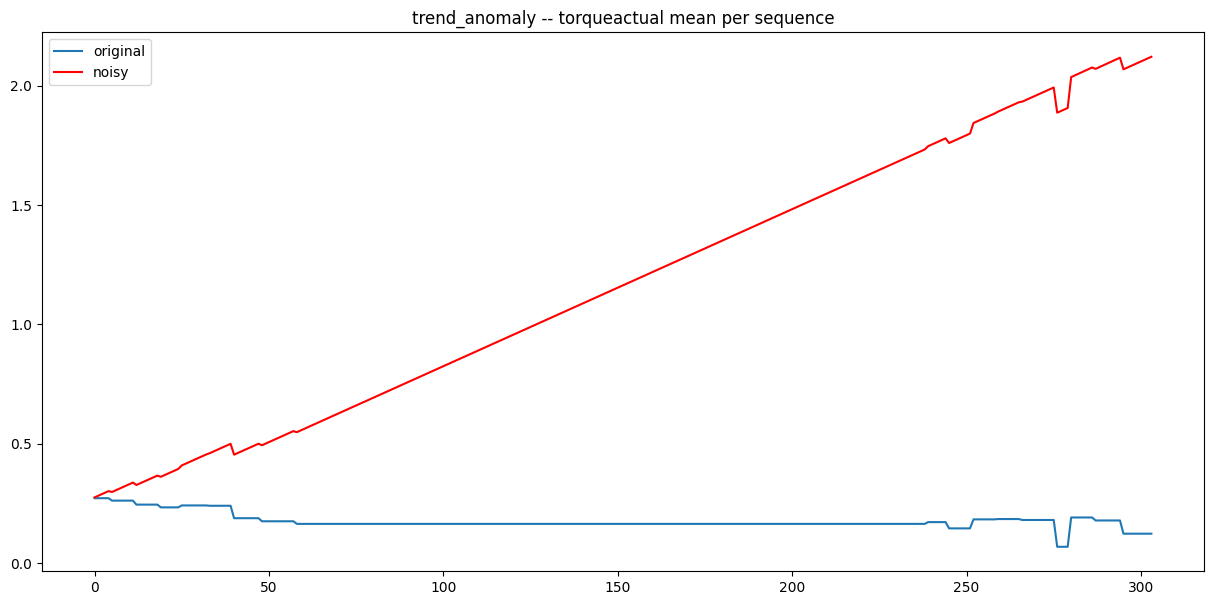

In [118]:
data_440 = data[data["type"] == "100440"]
data_440 = data_440.sort_values(by=["datetime", "timeindex"])
data_440 = data_440.reset_index(drop=True)

max_shift = 2

data_440 = NoiseMachine.trend_anomaly(data_440, max_shift=max_shift)
NoiseMachine.plot(data_440, column="torqueactual")

# Sinusoidal Anomaly

In [ ]:
data["type"] = data["id"].apply(lambda x: x.split("-")[1].split("|")[0])
data["datetime"] = data["id"].apply(lambda x: x.split("|")[1].replace("_", " "))
data["datetime"] = pd.to_datetime(data["datetime"])